In [4]:
import pandas as pd

# Cargar cada archivo Excel en un DataFrame
variedad_mejorada = pd.read_excel('sample_data/VariedadMejoradas.xlsx')
variedad_nativa = pd.read_excel('sample_data/VariedadNativas.xlsx')
estimacion_cosecha = pd.read_excel('sample_data/EstimacionesCosecha.xlsx')
produccion_papa = pd.read_excel('sample_data/ProduccionDePapa.xlsx')
uso_insumos = pd.read_excel('sample_data/UsoInsumos.xlsx')
control_quimico = pd.read_excel('sample_data/ControlQuimico.xlsx')
limitantes_cultivo = pd.read_excel('sample_data/LimitantesCultivoPapa.xlsx')

# Si tienen una columna común, como 'ID', hacemos una unión (merge) en base a esa columna
# Aquí 'ID' es un ejemplo, reemplaza con la columna que sea relevante
data = variedad_mejorada.merge(variedad_nativa, on='CodigoEnc') \
                        .merge(estimacion_cosecha, on='CodigoEnc') \
                        .merge(produccion_papa, on='CodigoEnc') \
                        .merge(uso_insumos, on='CodigoEnc') \
                        .merge(control_quimico, on='CodigoEnc') \
                        .merge(limitantes_cultivo, on='CodigoEnc')

# Mostrar las primeras filas para verificar que la unión fue correcta
print(data.head())
# Revisar si aún hay valores nulos
print(data.isnull().sum())

   CodigoEnc P4BMejNombre  P4BMejNro  P4BMejRend  P4BMejTolHelada  \
0          4         CICA        1.0         4.0              3.0   
1          4         CICA        1.0         4.0              3.0   
2          4         CICA        1.0         4.0              3.0   
3          4         CICA        1.0         4.0              3.0   
4          4         CICA        1.0         4.0              3.0   

   P4BMejResRancha  P4BMejMatSeca  P4BMejDemanda  P4BMejPrecio  P4BMejSabor  \
0              3.0            4.0            4.0           3.0          4.0   
1              3.0            4.0            4.0           3.0          4.0   
2              3.0            4.0            4.0           3.0          4.0   
3              3.0            4.0            4.0           3.0          4.0   
4              3.0            4.0            4.0           3.0          4.0   

   ...  P4ENatEsc2 P4ENatEsc3 P4ENatEsc4  P4ENatEsc5  P4EOtroEsp  P4ENatEsc6  \
0  ...         NaN        NaN 

In [5]:
# Eliminar columnas con más del 50% de valores nulos
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Eliminar filas con valores nulos en las columnas críticas
data = data.dropna(subset=['P4BMejNombre', 'P4BMejRend', 'P4BMejTolHelada'])

# Rellenar valores nulos con la media
data['P4BMejRend'] = data['P4BMejRend'].fillna(data['P4BMejRend'].mean())
data['P4BMejTolHelada'] = data['P4BMejTolHelada'].fillna(data['P4BMejTolHelada'].mean())

# Rellenar valores nulos en columnas categóricas con 'Desconocido'
data['P4BMejNombre'] = data['P4BMejNombre'].fillna('Desconocido')

# Verificar si quedan valores nulos
print(data.isnull().sum())

CodigoEnc              0
P4BMejNombre           0
P4BMejNro            435
P4BMejRend             0
P4BMejTolHelada        0
                   ...  
P4EMesAñoHel       12645
P4ESemProb         11352
P4ESemFalt           579
P4FVarMejBen           0
P4FVarMejEfe          42
Length: 79, dtype: int64


In [6]:
# Rellenar valores nulos en columnas numéricas con 0
data['P4BMejNro'] = data['P4BMejNro'].fillna(0)
data['P4ESemFalt'] = data['P4ESemFalt'].fillna(0)

# Rellenar valores nulos en columnas de fechas con un valor por defecto
data['P4EMesAñoHel'] = data['P4EMesAñoHel'].fillna('No reportado')

# Rellenar con la mediana en lugar de la media
data['P4ESemProb'] = data['P4ESemProb'].fillna(data['P4ESemProb'].median())

# Eliminar filas restantes con valores nulos
data = data.dropna(axis=0, how='any')

print(data.isnull().sum())

data.to_excel('sample_data/DatosDepurados.xlsx', index=False)


CodigoEnc          0
P4BMejNombre       0
P4BMejNro          0
P4BMejRend         0
P4BMejTolHelada    0
                  ..
P4EMesAñoHel       0
P4ESemProb         0
P4ESemFalt         0
P4FVarMejBen       0
P4FVarMejEfe       0
Length: 79, dtype: int64


         CodigoEnc   P4BMejNro   P4BMejRend  P4BMejTolHelada  P4BMejResRancha  \
count  1871.000000  1871.00000  1871.000000       1871.00000      1871.000000   
mean    390.309460     1.49225     3.747728          3.06093         2.951897   
std     427.561281     0.62550     0.804708          0.77496         0.817480   
min      10.000000     0.00000     2.000000          1.00000         1.000000   
25%      55.000000     1.00000     3.000000          3.00000         3.000000   
50%     170.000000     1.00000     4.000000          3.00000         3.000000   
75%     704.000000     2.00000     4.000000          4.00000         3.000000   
max    1135.000000     3.00000     5.000000          4.00000         4.000000   

       P4BMejMatSeca  P4BMejDemanda  P4BMejPrecio  P4BMejSabor  P4BMejTiempo  \
count    1871.000000    1871.000000   1871.000000  1871.000000   1871.000000   
mean        3.717798       4.048103      3.218065     4.069482      3.660075   
std         0.877831       0.7

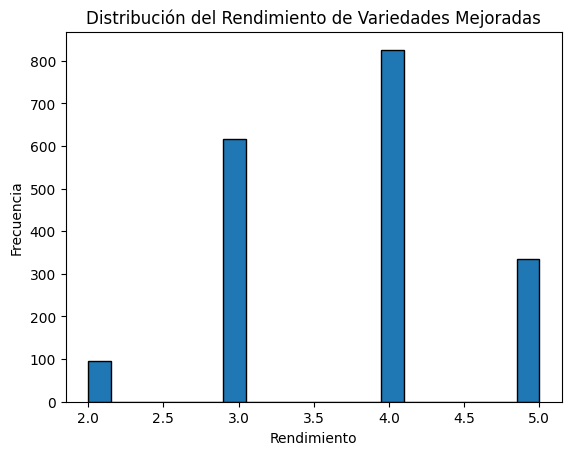

In [25]:
# Calcular estadísticas descriptivas de las variables numéricas
print(data.describe())

# Visualizar la distribución del rendimiento de variedades mejoradas
import matplotlib.pyplot as plt

plt.hist(data['P4BMejRend'], bins=20, edgecolor='black')
plt.title('Distribución del Rendimiento de Variedades Mejoradas')
plt.xlabel('Rendimiento')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
print(data.columns)

# Crear un DataFrame para variedades mejoradas
mejoradas = data[['CodigoEnc', 'P4BMejNombre', 'P4BMejRend']].copy()
mejoradas['TipoVariedad'] = 'Mejorada'
mejoradas = mejoradas.rename(columns={'P4BMejNombre': 'NombreVariedad', 'P4BMejRend': 'Rendimiento'})

# Crear un DataFrame para variedades nativas
nativas = data[['CodigoEnc', 'P4BNatNombre', 'P4BNatRend']].copy()
nativas['TipoVariedad'] = 'Nativa'
nativas = nativas.rename(columns={'P4BNatNombre': 'NombreVariedad', 'P4BNatRend': 'Rendimiento'})

# Combinar ambos DataFrames en uno solo
variedades_unidas = pd.concat([mejoradas, nativas])

# Ver los primeros registros para comprobar la unificación
print(variedades_unidas.head())

Index(['CodigoEnc', 'P4BMejNombre', 'P4BMejNro', 'P4BMejRend',
       'P4BMejTolHelada', 'P4BMejResRancha', 'P4BMejMatSeca', 'P4BMejDemanda',
       'P4BMejPrecio', 'P4BMejSabor', 'P4BMejTiempo', 'P4BNatNombre',
       'P4BNatNro', 'P4BNatRend', 'P4BNatTolHelada', 'P4BNatResRancha',
       'P4BNatMatSeca', 'P4BNatDemanda', 'P4BNatPrecio', 'P4BNatSabor',
       'P4BNatTiempo', 'P3BParcela', 'P3BNombre', 'P3BCultivos', 'P3BCoseCant',
       'P3BCoseUnidad', 'P3BCoseMedida', 'P3BCoseMes', 'P3BPorcentaje',
       'P4AParcela', 'P4ANombre', 'P4AVariedadNomb', 'P4ASemCant',
       'P4ASemUnid', 'P4ASemMed', 'P4AFuenSem', 'P4ACosCant', 'P4ACosUnid',
       'P4ACosMed', 'P4ADesSem', 'P4ADesCons', 'P4CParcela', 'P4CNombre',
       'P4CCultivo', 'P4CSolesEfec', 'P4CPagoRiego', 'P4CSisRiego',
       'P4CFertQuim', 'P4CFerProd01', 'P4CFerCant01', 'P4CFerUnid01',
       'P4CFerPrec01', 'P4CFerUniV01', 'P4CAboProp', 'P4CAboProd01',
       'P4CAboCant01', 'P4CAboUnid01', 'P4CAboPrec01', 'P4CAboUniV01

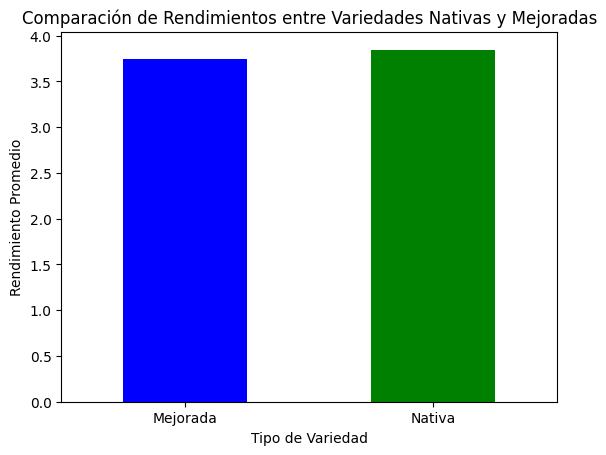

In [27]:
# Comparar rendimientos de variedades mejoradas y nativas usando un gráfico de barras
variedades_unidas.groupby('TipoVariedad')['Rendimiento'].mean().plot(kind='bar', color=['blue', 'green'])
plt.title('Comparación de Rendimientos entre Variedades Nativas y Mejoradas')
plt.xlabel('Tipo de Variedad')
plt.ylabel('Rendimiento Promedio')
plt.xticks(rotation=0)
plt.show()

In [28]:
# Ejemplo de correlación entre fertilizantes y rendimiento usando el DataFrame original
correlacion = data[['P4BMejRend', 'P4BNatRend', 'P4CFertQuim']].corr()
print(correlacion)

             P4BMejRend  P4BNatRend  P4CFertQuim
P4BMejRend     1.000000    0.607617    -0.025194
P4BNatRend     0.607617    1.000000    -0.083540
P4CFertQuim   -0.025194   -0.083540     1.000000


In [29]:
import statsmodels.api as sm

# Variables independientes: uso de fertilizantes
X = data[['P4CFertQuim']]
# Variable dependiente: rendimiento de variedades mejoradas y nativas
y_mejorada = data['P4BMejRend']
y_nativa = data['P4BNatRend']

# Agregar una constante para el modelo
X = sm.add_constant(X)

# Modelo de regresión para variedades mejoradas
model_mejorada = sm.OLS(y_mejorada, X).fit()
print('Regresión Lineal para Variedades Mejoradas:')
print(model_mejorada.summary())

# Modelo de regresión para variedades nativas
model_nativa = sm.OLS(y_nativa, X).fit()
print('\nRegresión Lineal para Variedades Nativas:')
print(model_nativa.summary())

Regresión Lineal para Variedades Mejoradas:
                            OLS Regression Results                            
Dep. Variable:             P4BMejRend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.187
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.276
Time:                        18:55:34   Log-Likelihood:                -2247.2
No. Observations:                1871   AIC:                             4498.
Df Residuals:                    1869   BIC:                             4510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const 

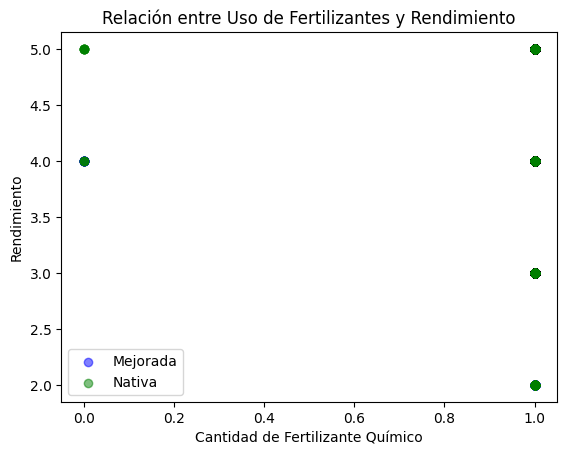

In [30]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para variedades mejoradas
plt.scatter(data['P4CFertQuim'], data['P4BMejRend'], alpha=0.5, label='Mejorada', color='blue')
plt.scatter(data['P4CFertQuim'], data['P4BNatRend'], alpha=0.5, label='Nativa', color='green')
plt.title('Relación entre Uso de Fertilizantes y Rendimiento')
plt.xlabel('Cantidad de Fertilizante Químico')
plt.ylabel('Rendimiento')
plt.legend()
plt.show()

In [31]:
from scipy.stats import f_oneway
import pandas as pd

# Unir los datos de tolerancia a heladas en un solo DataFrame
mejorada_helada = data[['P4BMejTolHelada']].copy()
mejorada_helada['TipoVariedad'] = 'Mejorada'
mejorada_helada = mejorada_helada.rename(columns={'P4BMejTolHelada': 'ToleranciaHelada'})

nativa_helada = data[['P4BNatTolHelada']].copy()
nativa_helada['TipoVariedad'] = 'Nativa'
nativa_helada = nativa_helada.rename(columns={'P4BNatTolHelada': 'ToleranciaHelada'})

# Combinar ambos DataFrames
heladas_unidas = pd.concat([mejorada_helada, nativa_helada])

# Extraer los valores de cada grupo para el ANOVA
mejorada_vals = heladas_unidas[heladas_unidas['TipoVariedad'] == 'Mejorada']['ToleranciaHelada'].dropna()
nativa_vals = heladas_unidas[heladas_unidas['TipoVariedad'] == 'Nativa']['ToleranciaHelada'].dropna()

# Realizar el ANOVA
f_stat, p_value = f_oneway(mejorada_vals, nativa_vals)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 84.84734315070412, P-value: 5.2360902612504e-20


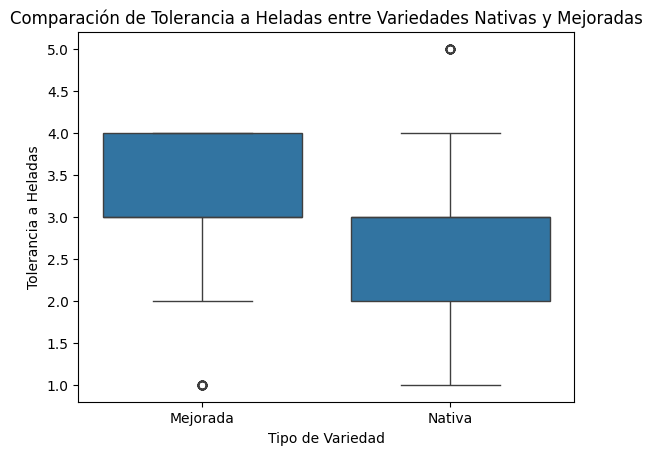

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='TipoVariedad', y='ToleranciaHelada', data=heladas_unidas)
plt.title('Comparación de Tolerancia a Heladas entre Variedades Nativas y Mejoradas')
plt.xlabel('Tipo de Variedad')
plt.ylabel('Tolerancia a Heladas')
plt.show()

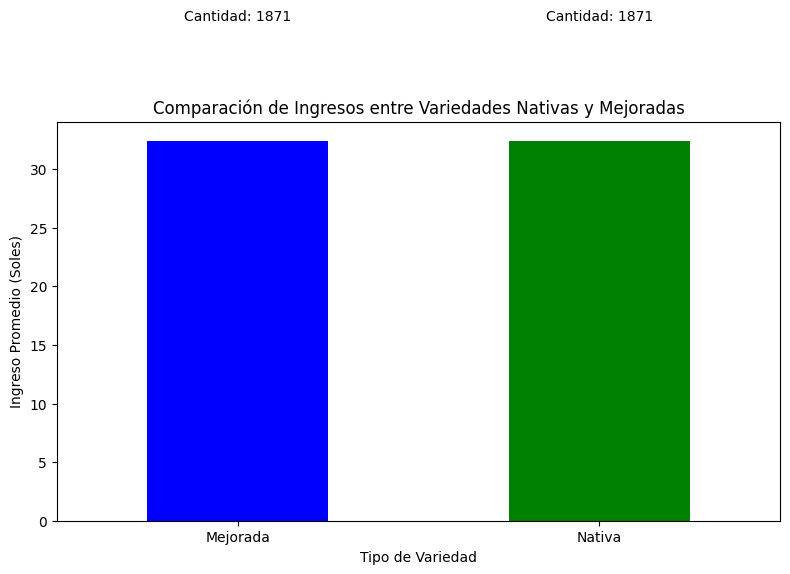

In [33]:
# Crear una columna 'TipoVariedad' y 'Ingreso' para combinar datos de ingresos de cada tipo de variedad
mejorada_ingresos = data[['CodigoEnc', 'P4CSolesEfec']].copy()
mejorada_ingresos['TipoVariedad'] = 'Mejorada'

nativa_ingresos = data[['CodigoEnc', 'P4CSolesEfec']].copy()
nativa_ingresos['TipoVariedad'] = 'Nativa'

# Unir ambos DataFrames para formar uno solo con 'TipoVariedad' e 'Ingreso'
ingresos_unidos = pd.concat([mejorada_ingresos, nativa_ingresos])

# Agrupar por 'TipoVariedad' y calcular la media de los ingresos
ingresos_comparacion = ingresos_unidos.groupby('TipoVariedad')['P4CSolesEfec'].mean()

# Calcular la cantidad de registros por cada tipo de variedad
cantidad_variedades = ingresos_unidos['TipoVariedad'].value_counts()

# Crear el gráfico de barras para comparar los ingresos
ax = ingresos_comparacion.plot(kind='bar', color=['blue', 'green'], figsize=(8, 6))
plt.title('Comparación de Ingresos entre Variedades Nativas y Mejoradas')
plt.xlabel('Tipo de Variedad')
plt.ylabel('Ingreso Promedio (Soles)')
plt.xticks(rotation=0)

# Añadir las etiquetas de la cantidad sobre cada barra
for i, (ingreso, cantidad) in enumerate(zip(ingresos_comparacion, cantidad_variedades)):
    ax.text(i, ingreso + 10, f'Cantidad: {cantidad}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

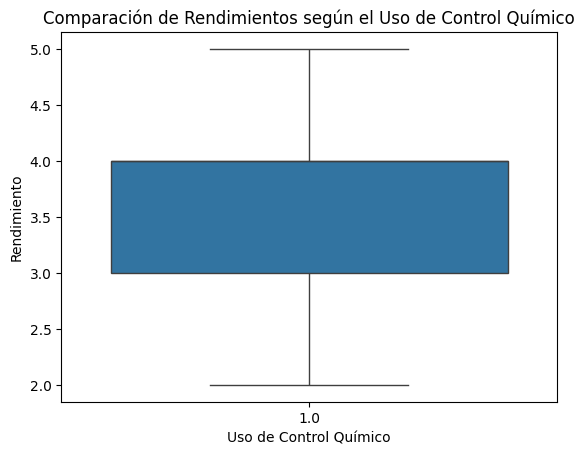

In [34]:
import seaborn as sns

# Asegurar que 'Rendimiento' y 'P4CContQuim' estén unificados en un solo DataFrame
# Unir datos de rendimiento para variedades mejoradas y nativas
mejorada_rendimiento = data[['CodigoEnc', 'P4BMejRend', 'P4CContQuim']].copy()
mejorada_rendimiento['TipoVariedad'] = 'Mejorada'
mejorada_rendimiento = mejorada_rendimiento.rename(columns={'P4BMejRend': 'Rendimiento'})

nativa_rendimiento = data[['CodigoEnc', 'P4BNatRend', 'P4CContQuim']].copy()
nativa_rendimiento['TipoVariedad'] = 'Nativa'
nativa_rendimiento = nativa_rendimiento.rename(columns={'P4BNatRend': 'Rendimiento'})

# Combinar ambos DataFrames en uno solo
rendimiento_unido = pd.concat([mejorada_rendimiento, nativa_rendimiento])

# Crear el boxplot para comparar rendimientos según el uso de control químico
sns.boxplot(x='P4CContQuim', y='Rendimiento', data=rendimiento_unido)
plt.title('Comparación de Rendimientos según el Uso de Control Químico')
plt.xlabel('Uso de Control Químico')
plt.ylabel('Rendimiento')
plt.show()

Index(['CodigoEnc', 'Rendimiento', 'P4CVeces01', 'P4CContQuim',
       'TipoVariedad'],
      dtype='object')


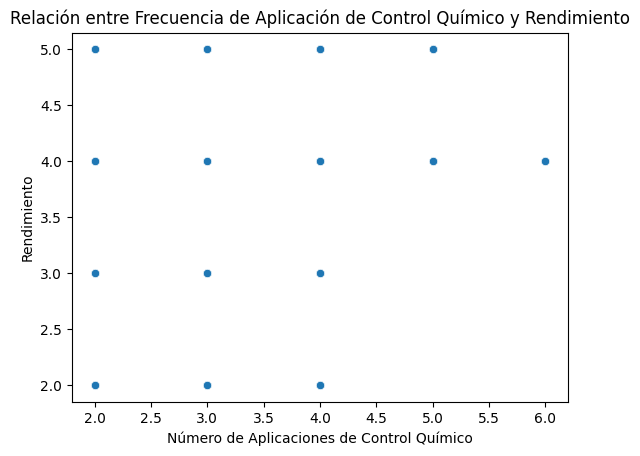

In [35]:
# Asegurarte de que la columna de veces aplicada esté en los DataFrames antes de unirlos
mejorada_rendimiento = data[['CodigoEnc', 'P4BMejRend', 'P4CVeces01', 'P4CContQuim']].copy()
mejorada_rendimiento['TipoVariedad'] = 'Mejorada'
mejorada_rendimiento = mejorada_rendimiento.rename(columns={'P4BMejRend': 'Rendimiento'})

nativa_rendimiento = data[['CodigoEnc', 'P4BNatRend', 'P4CVeces01', 'P4CContQuim']].copy()
nativa_rendimiento['TipoVariedad'] = 'Nativa'
nativa_rendimiento = nativa_rendimiento.rename(columns={'P4BNatRend': 'Rendimiento'})

# Combinar ambos DataFrames en uno solo
rendimiento_unido = pd.concat([mejorada_rendimiento, nativa_rendimiento])

# Verificar que la columna 'P4CVeces01' esté presente
print(rendimiento_unido.columns)


# Gráfico de dispersión para analizar la relación entre la cantidad de aplicaciones de control químico y el rendimiento
sns.scatterplot(x='P4CVeces01', y='Rendimiento', data=rendimiento_unido)
plt.title('Relación entre Frecuencia de Aplicación de Control Químico y Rendimiento')
plt.xlabel('Número de Aplicaciones de Control Químico')
plt.ylabel('Rendimiento')
plt.show()

In [36]:
correlacion = rendimiento_unido[['P4CVeces01', 'Rendimiento']].corr()
print(correlacion)

             P4CVeces01  Rendimiento
P4CVeces01     1.000000     0.488139
Rendimiento    0.488139     1.000000


In [23]:
# Convertir las columnas a tipo numérico (forzar la conversión y reemplazar errores con NaN)
data['P4CVeces01'] = pd.to_numeric(data['P4CVeces01'], errors='coerce')
data['P4BMejTolHelada'] = pd.to_numeric(data['P4BMejTolHelada'], errors='coerce')
data['P4CProd01'] = pd.to_numeric(data['P4CProd01'], errors='coerce')
rendimiento_unido['Rendimiento'] = pd.to_numeric(rendimiento_unido['Rendimiento'], errors='coerce')

# Eliminar filas con valores NaN en las columnas seleccionadas
data_clean = data[['P4CVeces01', 'P4BMejTolHelada', 'P4CProd01', 'Rendimiento']].dropna()

KeyError: "['Rendimiento'] not in index"

In [39]:
# Asegurarse de que la columna de ID esté presente en ambos DataFrames para la unión
data = data.merge(rendimiento_unido[['CodigoEnc', 'Rendimiento']], on='CodigoEnc', how='inner')

# Convertir las columnas a tipo numérico (forzar la conversión y reemplazar errores con NaN)
data['P4CVeces01'] = pd.to_numeric(data['P4CVeces01'], errors='coerce')
data['P4BMejTolHelada'] = pd.to_numeric(data['P4BMejTolHelada'], errors='coerce')
data['P4CProd01'] = pd.to_numeric(data['P4CProd01'], errors='coerce')
data['Rendimiento'] = pd.to_numeric(data['Rendimiento'], errors='coerce')

# Eliminar filas con valores NaN en las columnas seleccionadas
data_clean = data[['P4CVeces01', 'P4BMejTolHelada', 'P4CProd01', 'Rendimiento']].dropna()


In [41]:
import statsmodels.api as sm

X = data_clean[['P4CVeces01', 'P4BMejTolHelada', 'P4CProd01']]
y = data_clean['Rendimiento']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 4.925e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:59:52   Log-Likelihood:            -2.6539e+05
No. Observations:              268834   AIC:                         5.308e+05
Df Residuals:                  268830   BIC:                         5.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0254      0.012    1

In [42]:
# Regresión entre escasez de semillas y rendimiento
X = data[['P4ESemProb', 'P4ESemFalt']]
y = data['Rendimiento']
X = sm.add_constant(X)  # Agregar constante para el modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:59:57   Log-Likelihood:            -4.2578e+05
No. Observations:              403818   AIC:                         8.516e+05
Df Residuals:                  403815   BIC:                         8.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6259      0.002   3044.358      0.0

In [43]:
import numpy as np
import scipy.stats as stats

# Supongamos que 'data' es el DataFrame que contiene la columna 'Rendimiento'
# Asegúrate de reemplazar 'Especificacion_Superior' con el valor mínimo de rendimiento aceptable

# Definir el valor de la especificación superior para el rendimiento
Especificacion_Superior = 4  # Por ejemplo, si un rendimiento de 4 es considerado el mínimo aceptable

# Calcular la media y la desviación estándar del rendimiento
media_rendimiento = data['Rendimiento'].mean()
desviacion_rendimiento = data['Rendimiento'].std()

# Calcular el nivel sigma
nivel_sigma = (Especificacion_Superior - media_rendimiento) / desviacion_rendimiento

print(f"Media del rendimiento: {media_rendimiento}")
print(f"Desviación estándar del rendimiento: {desviacion_rendimiento}")
print(f"Nivel Sigma: {nivel_sigma:.2f}")

# Calcular el porcentaje de rendimiento dentro de las especificaciones usando la función de distribución normal acumulada
z_score = (Especificacion_Superior - media_rendimiento) / desviacion_rendimiento
porcentaje_aceptable = stats.norm.cdf(z_score) * 100

print(f"Porcentaje de productos dentro de especificaciones: {porcentaje_aceptable:.2f}%")


Media del rendimiento: 4.128117122069844
Desviación estándar del rendimiento: 0.8648650885437239
Nivel Sigma: -0.15
Porcentaje de productos dentro de especificaciones: 44.11%


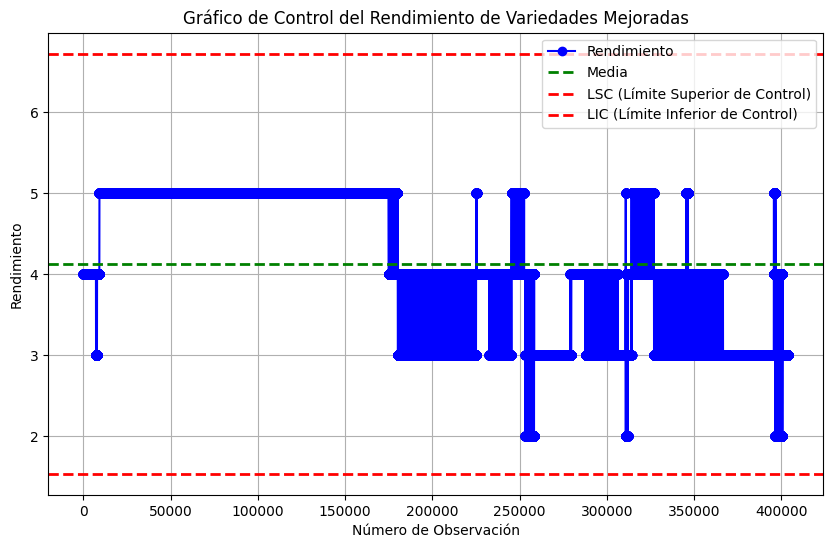

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y 'Rendimiento' es la columna de rendimiento de las variedades mejoradas.
# Calcular la media y la desviación estándar del rendimiento
media_rendimiento = data['Rendimiento'].mean()
desviacion_rendimiento = data['Rendimiento'].std()

# Calcular los límites de control
LSC = media_rendimiento + 3 * desviacion_rendimiento
LIC = media_rendimiento - 3 * desviacion_rendimiento

# Crear el gráfico de control
plt.figure(figsize=(10, 6))
plt.plot(data['Rendimiento'], marker='o', linestyle='-', color='blue', label='Rendimiento')
plt.axhline(media_rendimiento, color='green', linestyle='--', linewidth=2, label='Media')
plt.axhline(LSC, color='red', linestyle='--', linewidth=2, label='LSC (Límite Superior de Control)')
plt.axhline(LIC, color='red', linestyle='--', linewidth=2, label='LIC (Límite Inferior de Control)')

# Añadir etiquetas y título
plt.title('Gráfico de Control del Rendimiento de Variedades Mejoradas')
plt.xlabel('Número de Observación')
plt.ylabel('Rendimiento')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [45]:
import numpy as np
import pandas as pd

# Supongamos que 'data' es el DataFrame que contiene la columna 'Rendimiento'

# Definir los límites de especificación
LSE = 5.0  # Límite Superior de Especificación (por ejemplo, rendimiento máximo deseado)
LIE = 3.0  # Límite Inferior de Especificación (por ejemplo, rendimiento mínimo aceptable)

# Calcular la media y la desviación estándar del rendimiento
media_rendimiento = data['Rendimiento'].mean()
desviacion_rendimiento = data['Rendimiento'].std()

# Calcular Cp
Cp = (LSE - LIE) / (6 * desviacion_rendimiento)

# Calcular Cpk
Cpk = min((LSE - media_rendimiento) / (3 * desviacion_rendimiento),
          (media_rendimiento - LIE) / (3 * desviacion_rendimiento))

print(f"Índice Cp: {Cp:.2f}")
print(f"Índice Cpk: {Cpk:.2f}")

Índice Cp: 0.39
Índice Cpk: 0.34
